C:\Users\Melany\AppData\Local\Temp\ipykernel_13872\4138715672.py:35: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate()
C:\Users\Melany\AppData\Local\Temp\ipykernel_13872\4138715672.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod_overall = data.groupby('social_time_bin')['actual_productivity_score'].mean()
C:\Users\Melany\AppData\Local\Temp\ipykernel_13872\4138715672.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_overall = data.groupb

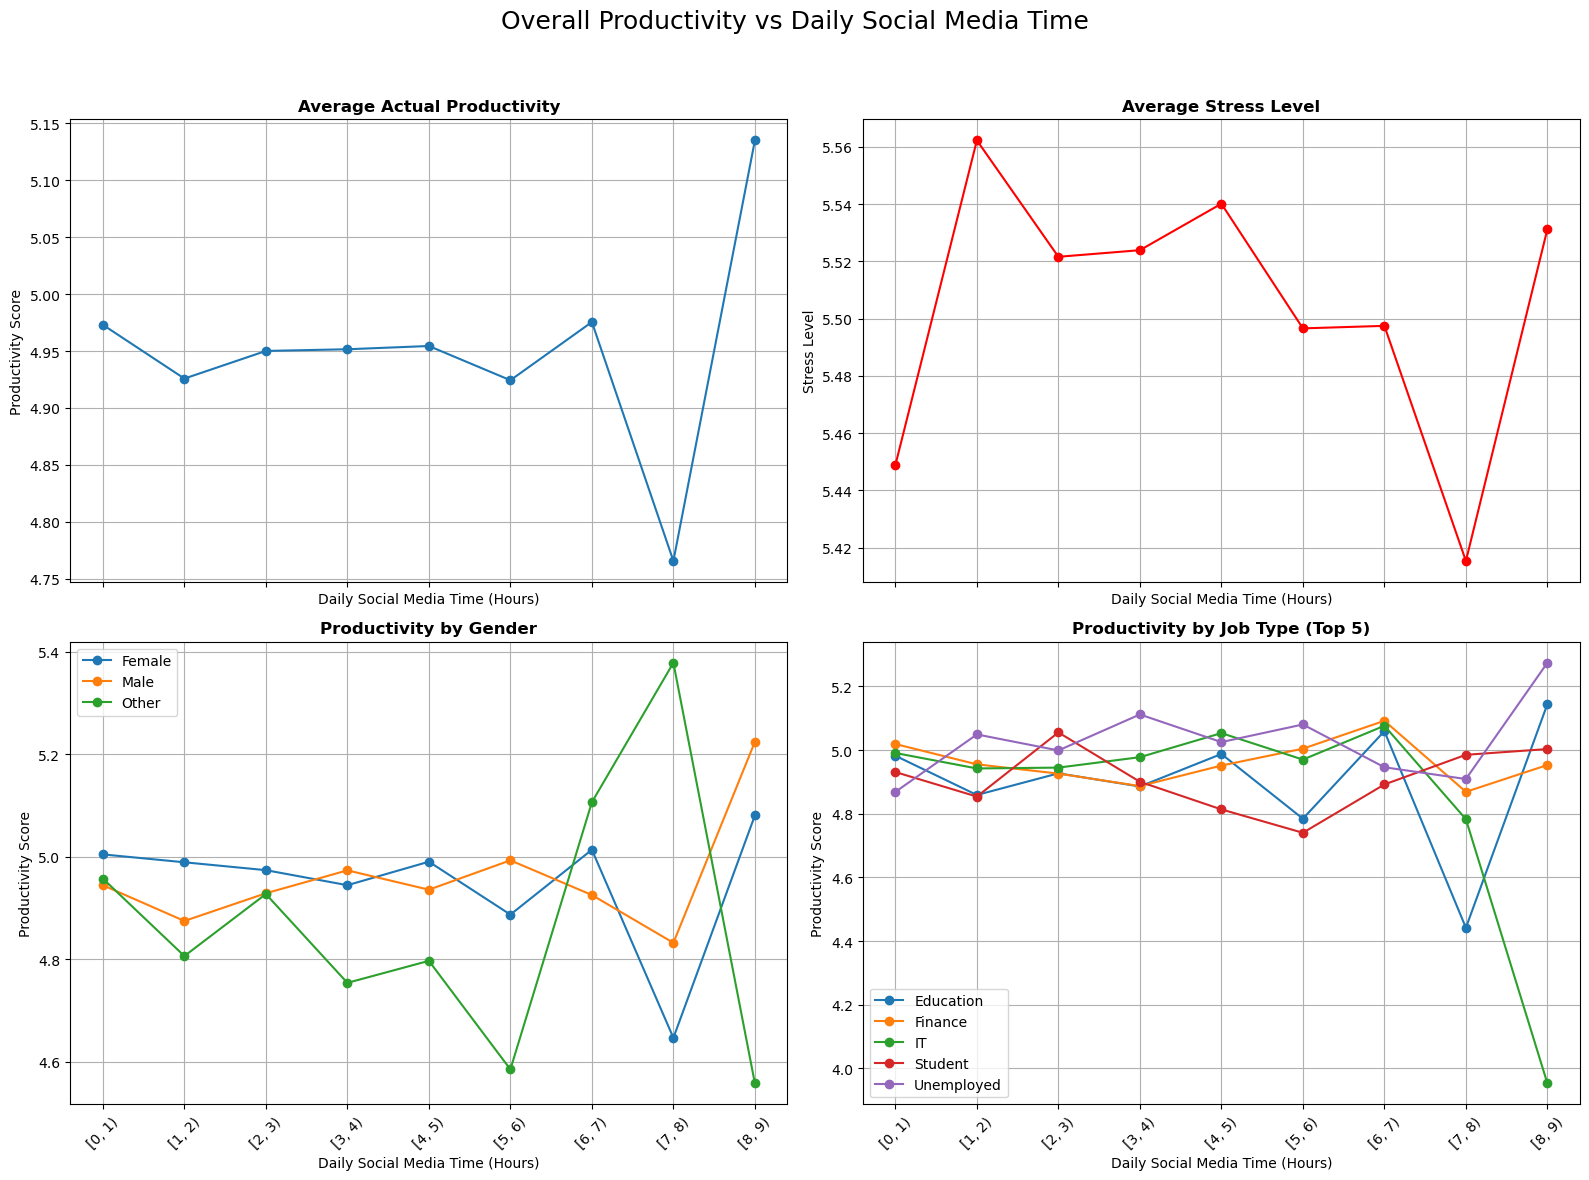

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# ~~~ PREPROCESSING ---
df = pd.read_csv("social_media_vs_productivity.csv")

# CONVERTING BOOLEANS TO NUMERIC
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# Checking for Outliers using IQR method
features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'stress_level',
    'number_of_notifications',
    'age'
]

def remove_outliers_iqr(data, features):
    verified_cleaned_data = data.copy()
    for column in features:
        Q1 = verified_cleaned_data[column].quantile(0.25)
        Q3 = verified_cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        verified_cleaned_data = verified_cleaned_data[(verified_cleaned_data[column] >= lower) & (verified_cleaned_data[column] <= upper)]
    return verified_cleaned_data

df_clean = remove_outliers_iqr(df, features_to_check)
df_clean = df_clean.interpolate()
df_clean = df_clean.dropna()
df_clean = pd.get_dummies(df_clean, columns=['job_type', 'gender'], drop_first=False) #if using categorical variable implement them here

# --- LINE PLOT CODE ---
# Keep only relevant columns
columns_needed = [
    'daily_social_media_time',
    'actual_productivity_score',
    'stress_level'
]
# Include all gender and job_type dummies
gender_cols = [col for col in df_clean.columns if col.startswith('gender_')]
job_cols = [col for col in df_clean.columns if col.startswith('job_type_')]
columns_needed += gender_cols + job_cols

data = df_clean[columns_needed].copy()

# Reverse one-hot encoding for gender and job_type for groupby plotting
data['gender'] = df_clean[gender_cols].idxmax(axis=1).str.replace('gender_', '')
data['job_type'] = df_clean[job_cols].idxmax(axis=1).str.replace('job_type_', '')

# Create social media bins (0-1h, 1-2h, ..., 9-10h)
data['social_time_bin'] = pd.cut(data['daily_social_media_time'], bins=np.arange(0, 11, 1), right=False)

# Grouped values
prod_overall = data.groupby('social_time_bin')['actual_productivity_score'].mean()
stress_overall = data.groupby('social_time_bin')['stress_level'].mean()
prod_by_gender = data.groupby(['social_time_bin', 'gender'])['actual_productivity_score'].mean().unstack()

# Top 5 job types
top_jobs = data['job_type'].value_counts().nlargest(5).index
filtered_data = data[data['job_type'].isin(top_jobs)]
prod_by_job = filtered_data.groupby(['social_time_bin', 'job_type'])['actual_productivity_score'].mean().unstack()

# --- PLOTTING ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12), sharex=True)
fig.suptitle("Overall Productivity vs Daily Social Media Time", fontsize=18)

# Subplot 1: Overall Productivity
axes[0, 0].plot(prod_overall.index.astype(str), prod_overall.values, marker='o')
axes[0, 0].set_title("Average Actual Productivity", fontweight='bold')
axes[0, 0].set_ylabel("Productivity Score")
axes[0, 0].tick_params(axis='x', rotation=45)

# Subplot 2: Stress Level
axes[0, 1].plot(stress_overall.index.astype(str), stress_overall.values, color='red', marker='o')
axes[0, 1].set_title("Average Stress Level", fontweight='bold')
axes[0, 1].set_ylabel("Stress Level")
axes[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Productivity by Gender
for gender in prod_by_gender.columns:
    axes[1, 0].plot(prod_by_gender.index.astype(str), prod_by_gender[gender], marker='o', label=gender)
axes[1, 0].set_title("Productivity by Gender", fontweight='bold')
axes[1, 0].set_ylabel("Productivity Score")
axes[1, 0].legend()
axes[1, 0].tick_params(axis='x', rotation=45)

# Subplot 4: Productivity by Job Type
for job in prod_by_job.columns:
    axes[1, 1].plot(prod_by_job.index.astype(str), prod_by_job[job], marker='o', label=job)
axes[1, 1].set_title("Productivity by Job Type (Top 5)", fontweight='bold')
axes[1, 1].set_ylabel("Productivity Score")
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=45)

# Common styling
for ax in axes.flat:
    ax.set_xlabel("Daily Social Media Time (Hours)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import os
os.getcwd()

'C:\\Users\\Melany\\anaconda_projects'

In [ ]:
# other calculation
import pandas as pd

# Load your dataset
df = pd.read_csv("social_media_vs_productivity.csv")
df = df[['gender', 'stress_level']].dropna()
# Group by gender and calculate the average stress level
avg_stress = df.groupby('gender')['stress_level'].mean()
# avg stress lvl of all genders
print(avg_stress)
print("\nOverall stress lvl of gender:", round(avg_stress,2))


gender
Female    5.510327
Male      5.520756
Other     5.477231
Name: stress_level, dtype: float64

Overall stress lvl of gender: gender
Female    5.51
Male      5.52
Other     5.48
Name: stress_level, dtype: float64


In [ ]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# ~~~ PREPROCESSING ---
df = pd.read_csv("social_media_vs_productivity.csv")

# CONVERTING BOOLEANS TO NUMERIC
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# Checking for Outliers using IQR method
features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'stress_level',
    'number_of_notifications',
    'age'
]

def remove_outliers_iqr(data, features):
    verified_cleaned_data = data.copy()
    for column in features:
        Q1 = verified_cleaned_data[column].quantile(0.25)
        Q3 = verified_cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        verified_cleaned_data = verified_cleaned_data[(verified_cleaned_data[column] >= lower) & (verified_cleaned_data[column] <= upper)]
    return verified_cleaned_data

df_clean = remove_outliers_iqr(df, features_to_check)
df_clean = df_clean.interpolate()
df_clean = df_clean.dropna()
df_clean = pd.get_dummies(df_clean, columns=['job_type', 'gender'], drop_first=False) #if using categorical variable implement them here
# Load your dataset
df = pd.read_csv("social_media_vs_productivity.csv")
df = df.dropna(subset=['gender', 'actual_productivity_score'])

# Male and Female
df = df[['gender', 'actual_productivity_score']].dropna()

# Group by gender with calculation
avg_productivity_by_gender = df.groupby('gender')['actual_productivity_score'].mean()


print("Average Actual Productivity Score by Gender:")
print(avg_productivity_by_gender)

# Overall average productivity (all users)
overall_avg = df['actual_productivity_score'].mean()
print("\nOverall Average Productivity Score:", round(overall_avg, 2))



Average Actual Productivity Score by Gender:
gender
Female    4.957461
Male      4.955053
Other     4.841777
Name: actual_productivity_score, dtype: float64

Overall Average Productivity Score: 4.95


C:\Users\Melany\AppData\Local\Temp\ipykernel_13872\3814747450.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate()


In [ ]:
#training models

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("social_media_vs_productivity.csv")


# Select columns
columns = [
    'daily_social_media_time', 'sleep_hours', 'stress_level', 'job_type',
    'number_of_notifications', 'age',
    'actual_productivity_score', 'uses_focus_apps'
]

data = df[columns].dropna()
# One-hot encode 'gender' column
X = pd.get_dummies(data.drop(columns='actual_productivity_score'), drop_first=False).astype(float)

#Focused variable: actual productivitity--------------------------------------------------------------------------
y = data['actual_productivity_score']

# -----------------------------------------------------------------------------------------------------------------


print(data.columns)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 1. Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 2. Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)



# Predict using both models
y_pred_lin = lin_reg.predict(X_test)
y_pred_tree = tree_reg.predict(X_test)

# Linear Regression Model
print("🔹 Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R² Score:", r2_score(y_test, y_pred_lin))
print()

# Decision Tree Model
print("🔸 Decision Tree Regressor:")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("R² Score:", r2_score(y_test, y_pred_tree))

print(y_test.values[:5])         # Actual scores
print(y_pred_lin[:5])            # Predicted scores by Linear Regression


FileNotFoundError: [Errno 2] No such file or directory: 'social_media_vs_productivity.csv'

C:\Users\Melany\AppData\Local\Temp\ipykernel_13872\3019249530.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate()


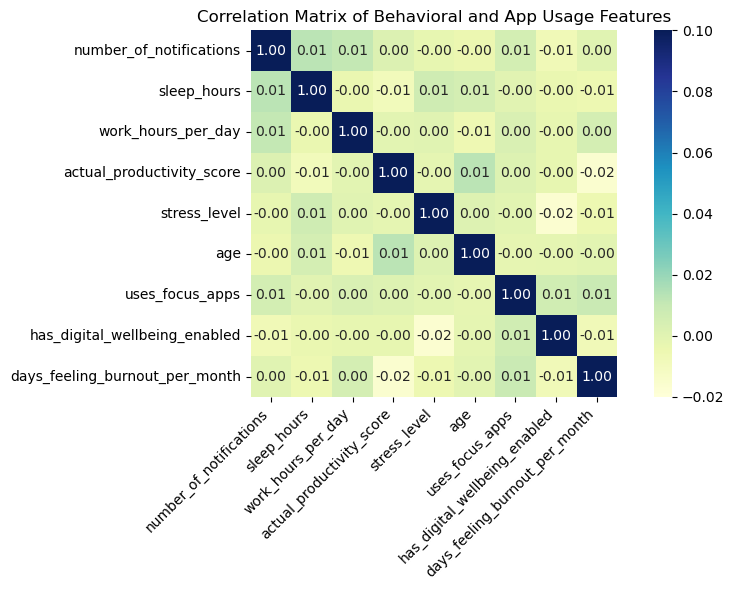

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ~~~ PREPROCESSING ---
df = pd.read_csv("social_media_vs_productivity.csv")

# CONVERTING BOOLEANS TO NUMERIC
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# Checking for Outliers using IQR method
features_to_check = [
    'daily_social_media_time',
    'sleep_hours',
    'work_hours_per_day',
    'actual_productivity_score',
    'stress_level',
    'number_of_notifications',
    'age',
    'days_feeling_burnout_per_month'
]

def remove_outliers_iqr(data, features):
    verified_cleaned_data = data.copy()
    for column in features:
        Q1 = verified_cleaned_data[column].quantile(0.25)
        Q3 = verified_cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        verified_cleaned_data = verified_cleaned_data[(verified_cleaned_data[column] >= lower) & (verified_cleaned_data[column] <= upper)]
    return verified_cleaned_data

df_clean = remove_outliers_iqr(df, features_to_check)
df_clean = df_clean.interpolate()
df_clean = df_clean.dropna()
df_clean = pd.get_dummies(df_clean, columns=['job_type', 'gender'], drop_first=False)

# ~~~~   HEATMAP  ~~~~~
data = df_clean.copy()

# Selected features: behavioral traits and digital habits
features = [
    'number_of_notifications',
    'sleep_hours',
    'work_hours_per_day',
    'actual_productivity_score',
    'stress_level',
    'age',
    'uses_focus_apps',
    'has_digital_wellbeing_enabled',
    'days_feeling_burnout_per_month'

]

# Drop missing values just in case
df_heat = df_clean[features].dropna()

# Correlation matrix
correlation_matrix = df_heat.corr()

# Figure
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", square=True, vmin=-0.02, vmax=0.1)
plt.title("Correlation Matrix of Behavioral and App Usage Features")
plt.xticks(rotation=45, ha='right')  # Tilt x-axis labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

✅ Data after IQR cleaning and Robust Scaling:
        age  daily_social_media_time  number_of_notifications  \
0  0.625000                 0.430532                      0.1   
1  0.625000                 0.504114                      0.0   
2 -0.208333                 0.396790                     -1.1   
3  0.666667                -1.106679                      0.0   
4  0.000000                 0.280664                      0.5   

   work_hours_per_day  perceived_productivity_score  \
0           -0.097101                      0.716200   
1           -1.164061                      0.256468   
2           -0.169357                     -0.804993   
3           -0.071324                      0.946223   
4            0.607616                      0.566162   

   actual_productivity_score  stress_level  sleep_hours  \
0                   0.733053          -0.4    -0.704911   
1                   0.321658           0.2     0.523054   
2                  -0.782409          -0.4    -0.094810

C:\Users\Melany\AppData\Local\Temp\ipykernel_13872\1551161180.py:26: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_clean = df_clean.interpolate()


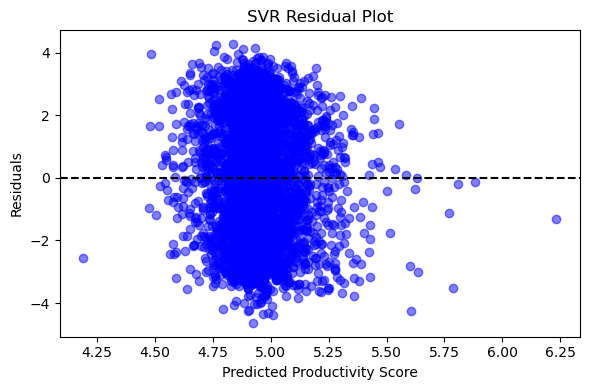

SVR R² Score: -0.006153572138825503
SVR MSE: 3.5516173792988313
SVR MAE: 1.6147415101494758


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error


# ~~~ PREPROCESSING ---
df = pd.read_csv("social_media_vs_productivity.csv")

# CONVERTING BOOLEANS TO NUMERIC
df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# Checking for Outliers using IQR method
features_to_check = [
    'daily_social_media_time', 'number_of_notifications', 'actual_productivity_score',
    'sleep_hours', 'work_hours_per_day', 'stress_level'
]

def remove_outliers_iqr(data, features):
    verified_cleaned_data = data.copy()
    for column in features:
        Q1 = verified_cleaned_data[column].quantile(0.25)
        Q3 = verified_cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        verified_cleaned_data = verified_cleaned_data[
            (verified_cleaned_data[column] >= lower) & (verified_cleaned_data[column] <= upper)
        ]
    return verified_cleaned_data

df_clean = remove_outliers_iqr(df, features_to_check)

# --- INTERPOLATE + ONE-HOT ENCODING ---
num_cols = df_clean.select_dtypes(include='number').columns
df_clean[num_cols] = df_clean[num_cols].interpolate()
df_clean = pd.get_dummies(df_clean, columns=['job_type', 'gender'], drop_first=False)
df_clean = df_clean.dropna()

# --- FEATURE ENGINEERING ---
df_clean['social_media_x_notifications'] = df_clean['daily_social_media_time'] * df_clean['number_of_notifications']
df_clean['work_to_sleep_ratio'] = df_clean['work_hours_per_day'] / (df_clean['sleep_hours'] + 1e-5)
df_clean['high_social_use'] = (df_clean['daily_social_media_time'] > 5).astype(int)

# --- FEATURES & TARGET ---
selected_features = ['social_media_x_notifications',
    'work_to_sleep_ratio',
    'high_social_use',
    'stress_level',
    'sleep_hours']
X = df_clean[selected_features]
y = df_clean['actual_productivity_score']

# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- SCALING ---
scaler_X = RobustScaler()
scaler_y = RobustScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# --- TRAIN SVR ---
svr = SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# --- PREDICT & INVERSE SCALE ---
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# --- RESIDUAL PLOT ---
residuals_svr = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals_svr, color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("SVR Residual Plot")
plt.xlabel("Predicted Productivity Score")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# metrics
print("SVR R² Score:", r2_score(y_test, y_pred))
print("SVR MSE:", mean_squared_error(y_test, y_pred))

mae_svr = mean_absolute_error(y_test, y_pred)
print("SVR MAE:", mae_svr)

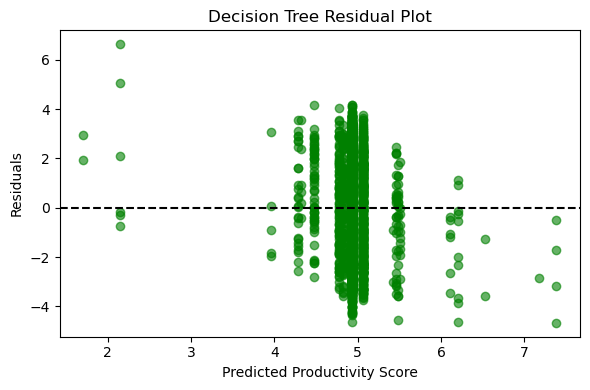

Decision Tree R² Score: -0.013244272637290111
Decision Tree MSE: 3.5766468139886234
Decision Tree MAE: 1.617165896306821


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# ~~~ PREPROCESSING ---
df = pd.read_csv("social_media_vs_productivity.csv")

df['uses_focus_apps'] = df['uses_focus_apps'].astype(int)
df['has_digital_wellbeing_enabled'] = df['has_digital_wellbeing_enabled'].astype(int)

# IQR outlier removal method
features_to_check = [
    'daily_social_media_time', 'number_of_notifications', 'actual_productivity_score',
    'sleep_hours', 'work_hours_per_day', 'stress_level'
]

def remove_outliers_iqr(data, features):
    verified_cleaned_data = data.copy()
    for column in features:
        Q1 = verified_cleaned_data[column].quantile(0.25)
        Q3 = verified_cleaned_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        verified_cleaned_data = verified_cleaned_data[
            (verified_cleaned_data[column] >= lower) & (verified_cleaned_data[column] <= upper)
        ]
    return verified_cleaned_data

df_clean = remove_outliers_iqr(df, features_to_check)

# data pre processing: INTERPOLATE + ONE-HOT ENCODING
num_cols = df_clean.select_dtypes(include='number').columns
df_clean[num_cols] = df_clean[num_cols].interpolate()
df_clean = pd.get_dummies(df_clean, columns=['job_type', 'gender'], drop_first=False)
df_clean = df_clean.dropna()

# FEATURE ENGINEERING
df_clean['social_media_x_notifications'] = df_clean['daily_social_media_time'] * df_clean['number_of_notifications']
df_clean['work_to_sleep_ratio'] = df_clean['work_hours_per_day'] / (df_clean['sleep_hours'] + 1e-5)
df_clean['high_social_use'] = (df_clean['daily_social_media_time'] > 5).astype(int)

# 5 selected features
selected_features = ['social_media_x_notifications',
    'work_to_sleep_ratio',
    'high_social_use',
    'stress_level',
    'sleep_hours']
X = df_clean[selected_features]
y = df_clean['actual_productivity_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# decision tree model
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

# predictions
y_pred_tree = tree.predict(X_test)

# RESIDUAL PLOT (instead of scatter)
residuals_tree = y_test - y_pred_tree
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_tree, residuals_tree, color='green', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Productivity Score")
plt.ylabel("Residuals")
plt.title("Decision Tree Residual Plot")
plt.tight_layout()
plt.show()

# METRICS
print("Decision Tree R² Score:", r2_score(y_test, y_pred_tree))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))
mae_tree = mean_absolute_error(y_test, y_pred_tree)
print("Decision Tree MAE:", mae_tree)
